In [4]:
# Import Xarray
import xarray as xr

## Applied Xarray Example: Plot ERA5 Surface Temperature

### First, we can use Xarray to open up one ERA5 file on Triton using open_dataset.
The data has four dimensions: longitude, latitude, level, and time. Each time represents one hour of the day on the date we specified: April 9, 2013. Level refers to the vertical model level, where level 137 is closest to the surface.

In [5]:
# Use Xarray's open dataset to read in our ERA5 data by specifying the path and filename 
ds = xr.open_dataset('/home/scratch/era5/era5_sigma/era5_2013-04-09.nc')
ds

<xarray.Dataset>
Dimensions:    (longitude: 245, latitude: 150, level: 93, time: 24)
Coordinates:
  * longitude  (longitude) float32 234.0 234.2 234.5 234.8 ... 294.5 294.8 295.0
  * latitude   (latitude) float32 55.0 54.75 54.5 54.25 ... 18.25 18.0 17.75
  * level      (level) int32 45 46 47 48 49 50 51 ... 132 133 134 135 136 137
  * time       (time) datetime64[ns] 2013-04-09 ... 2013-04-09T23:00:00
Data variables:
    t          (time, level, latitude, longitude) float32 ...
    q          (time, level, latitude, longitude) float32 ...
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
    z          (time, level, latitude, longitude) float32 ...
    p          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-02-07 10:08:21 GMT by grib_to_netcdf-2.10.0: /opt/ecmw...

### We can select one specific time using Xarray's sel function on the "time" dimension. 
In this case, we select 12 UTC. We're now left with only three dimensions: longitude, latitude, and level.

In [6]:
# Selected 12 UTC; other times can be selected by simply changing the '12' to the desired hour (0-23)
ds1 = ds.sel(time='2013-04-09T12:00:00.000000000')
ds1

<xarray.Dataset>
Dimensions:    (longitude: 245, latitude: 150, level: 93)
Coordinates:
  * longitude  (longitude) float32 234.0 234.2 234.5 234.8 ... 294.5 294.8 295.0
  * latitude   (latitude) float32 55.0 54.75 54.5 54.25 ... 18.25 18.0 17.75
  * level      (level) int32 45 46 47 48 49 50 51 ... 132 133 134 135 136 137
    time       datetime64[ns] 2013-04-09T12:00:00
Data variables:
    t          (level, latitude, longitude) float32 ...
    q          (level, latitude, longitude) float32 ...
    u          (level, latitude, longitude) float32 ...
    v          (level, latitude, longitude) float32 ...
    z          (level, latitude, longitude) float32 ...
    p          (level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-02-07 10:08:21 GMT by grib_to_netcdf-2.10.0: /opt/ecmw...

### We can also select a specific model level. Here, we select the model level closest to the surface (level 137).

In [7]:
# Use .sel on the level dimension to select one level of interest
ds2 = ds1.sel(level=137)
ds2

<xarray.Dataset>
Dimensions:    (longitude: 245, latitude: 150)
Coordinates:
  * longitude  (longitude) float32 234.0 234.2 234.5 234.8 ... 294.5 294.8 295.0
  * latitude   (latitude) float32 55.0 54.75 54.5 54.25 ... 18.25 18.0 17.75
    level      int32 137
    time       datetime64[ns] 2013-04-09T12:00:00
Data variables:
    t          (latitude, longitude) float32 ...
    q          (latitude, longitude) float32 ...
    u          (latitude, longitude) float32 ...
    v          (latitude, longitude) float32 ...
    z          (latitude, longitude) float32 ...
    p          (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-02-07 10:08:21 GMT by grib_to_netcdf-2.10.0: /opt/ecmw...

### Since we are now left with only the latitude and longitude dimensions, we can easily plot any of the data variables (t, q, u, v, z, p). 
Here, we plot temperature (t) using the built in Xarray plotting function.

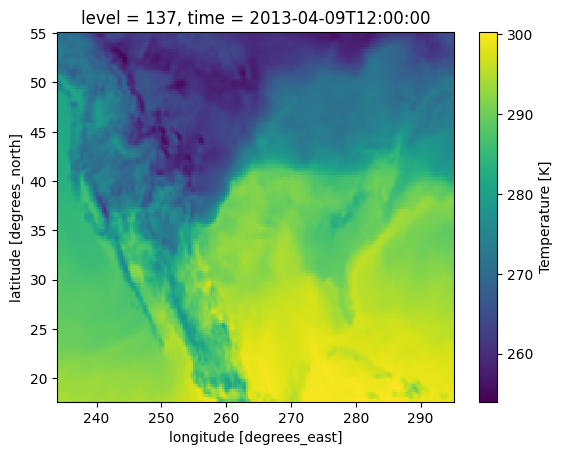

In [8]:
# 'ds.t' specifies that we want to select t (temperature); we could also do the same for any of the other data variables in this dataset
# '.plot' takes advantage of Xarray's built in plotting function, which is useful for getting a quick look at our data
ds2.t.plot()

### We can also visualize all hours of surface temperature on one quick plot. 
'ds.t' selects only the temperature variable from our initial ERA5 file. We can again use .sel to select out the level we're interested in (137). 

In [9]:
# Select the model level closest to the surface and name it sfc_temp
sfc_temp = ds.t.sel(level=137)
sfc_temp

<xarray.DataArray 't' (time: 24, latitude: 150, longitude: 245)>
[882000 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 234.0 234.2 234.5 234.8 ... 294.5 294.8 295.0
  * latitude   (latitude) float32 55.0 54.75 54.5 54.25 ... 18.25 18.0 17.75
    level      int32 137
  * time       (time) datetime64[ns] 2013-04-09 ... 2013-04-09T23:00:00
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature

### Here we plot all 24 hours of surface temperature. 
 - 'sfc_temp' is the name of the Xarray dataset we want to plot. 
- 'col="time"' specifies that we want to subset our dataset by time, meaning we want seperate plots for each time in the dataset. 
- 'col_wrap=4' specifies the number of columns we want on our plot. Because we have 24 times, this results in a plot with 4 columns and 6 rows. 

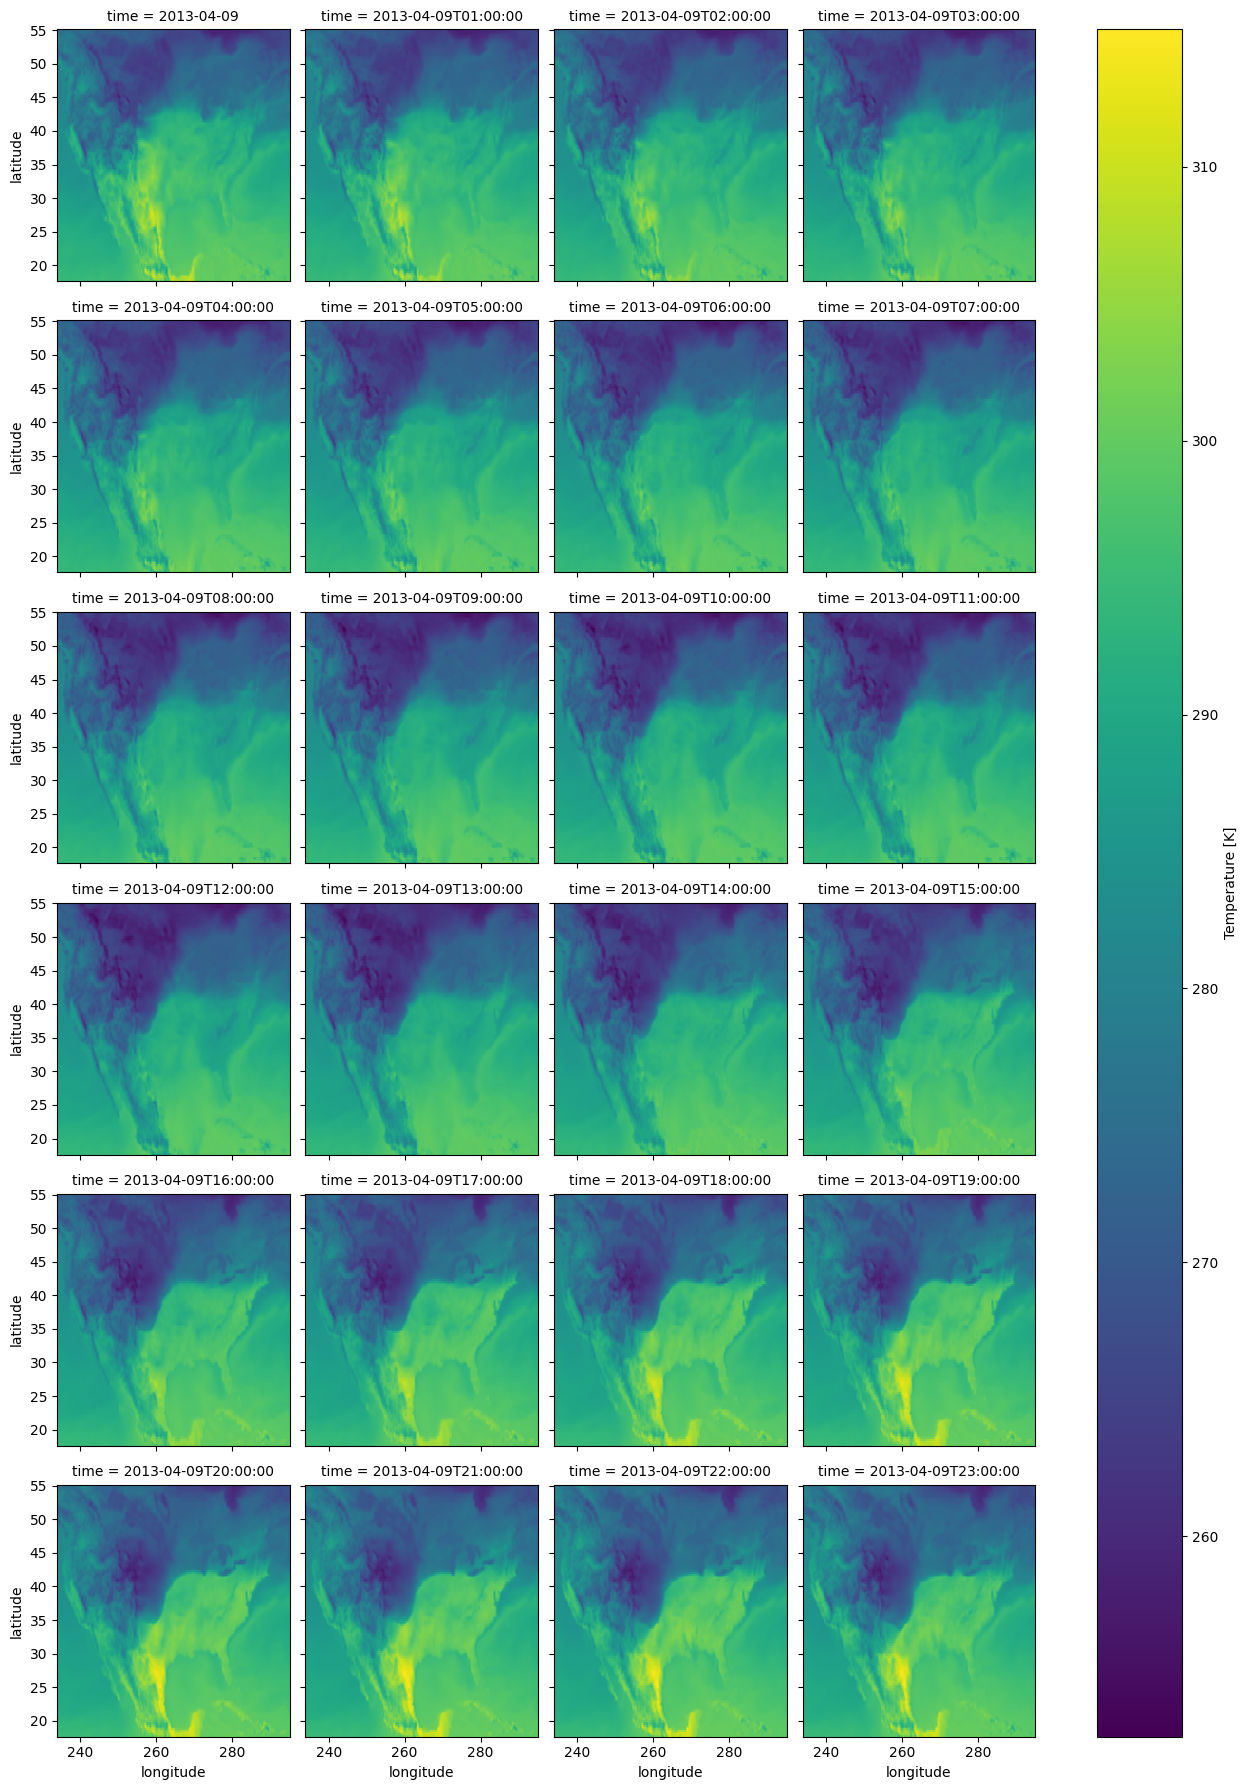

In [10]:
# Created a facetted plot with Xarray by splitting the dataset along the time dimension
sfc_temp.plot(col="time", col_wrap=4)

### We can also use Xarray to easily calculate the average temperature over the 24 hour period at the lowest model level. 
To do so, we apply ".mean" to the surface temperature dataset. Because we want the mean over the 24 hour period, we specify that we want to take the mean over the time dimension (dim='time').

In [11]:
# Find the daily mean temperature at the lowest model level
mean_sfc_temp = sfc_temp.mean(dim='time')
mean_sfc_temp

<xarray.DataArray 't' (latitude: 150, longitude: 245)>
array([[273.1521 , 272.23352, 271.95123, ..., 266.10126, 266.15103,
        266.09375],
       [273.30844, 272.99045, 272.96933, ..., 266.0789 , 266.03854,
        266.01053],
       [274.08597, 274.00055, 273.70032, ..., 266.24777, 266.19968,
        266.19116],
       ...,
       [294.39594, 294.33926, 294.28333, ..., 298.7238 , 298.87006,
        298.78342],
       [294.574  , 294.50577, 294.44205, ..., 298.81406, 298.85498,
        298.82303],
       [294.76645, 294.67844, 294.60684, ..., 298.89124, 298.82596,
        298.86545]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 234.0 234.2 234.5 234.8 ... 294.5 294.8 295.0
  * latitude   (latitude) float32 55.0 54.75 54.5 54.25 ... 18.25 18.0 17.75
    level      int32 137

### Again, Xarray's built in plotting function can be used to make a simple plot of our data (mean surface temp).

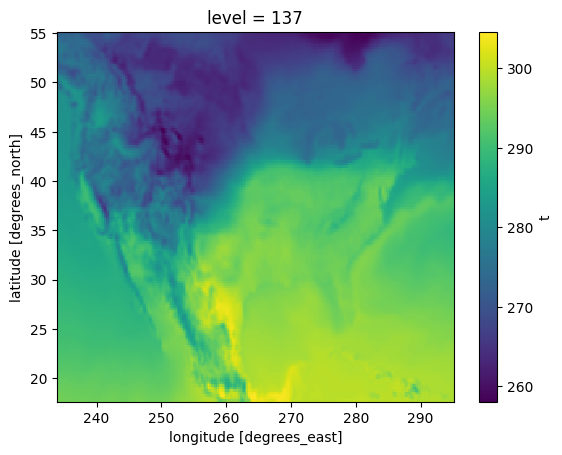

In [12]:
mean_sfc_temp.plot()

### If we want to see how a variable changed over time, we can use .sel on the time dimension to select the times of interest and subtract the two. 
Here, we calculate the difference between the 1 UTC and 12 UTC temperature at the surface.

In [13]:
# Use .sel on the time dimension to select two times in our dataset; subtracting the two gives our temperature difference
temp_diff = sfc_temp.sel(time='2013-04-09T01:00:00.000000000') - sfc_temp.sel(time='2013-04-09T12:00:00.000000000')
temp_diff

<xarray.DataArray 't' (latitude: 150, longitude: 245)>
array([[ 3.7036743 ,  3.8327637 ,  4.115204  , ...,  0.17581177,
         0.03366089, -0.17208862],
       [ 4.160095  ,  4.373352  ,  4.674469  , ...,  0.15338135,
        -0.05987549, -0.3310852 ],
       [ 4.8970947 ,  5.0747986 ,  5.334778  , ...,  0.1907959 ,
        -0.11224365, -0.4302063 ],
       ...,
       [ 0.4133911 ,  0.29925537,  0.23007202, ...,  0.18331909,
         0.10101318,  0.10662842],
       [ 0.43771362,  0.3647461 ,  0.29367065, ...,  0.16647339,
         0.11782837,  0.15341187],
       [ 0.40966797,  0.37036133,  0.3086548 , ...,  0.08230591,
         0.09915161,  0.09729004]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 234.0 234.2 234.5 234.8 ... 294.5 294.8 295.0
  * latitude   (latitude) float32 55.0 54.75 54.5 54.25 ... 18.25 18.0 17.75
    level      int32 137

### Plotting this temperature difference, we see much of the CONUS warmed up from 1 to 12 UTC, with a particularly large temperature increase in the central CONUS.

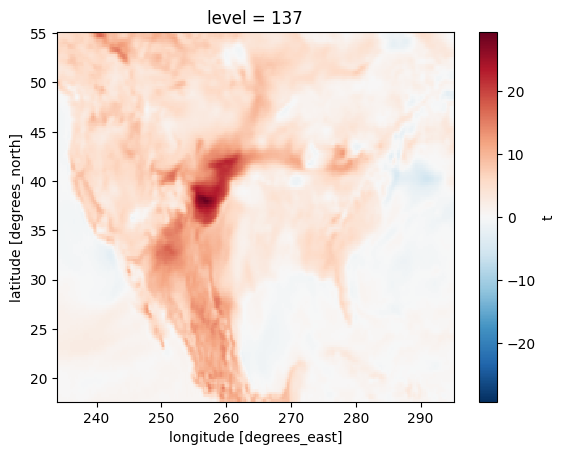

In [14]:
# Use Xarray's built in plotting function to make a quick plot of our 1 to 12 UTC temperature change
temp_diff.plot()

### If we want to know the magnitude of largest temperature difference anywhere in our domain, we use the '.max'. The result tells us that the greatest temperature increase over this time period was 29.35 K. 

In [15]:
# Applying .max() to the temperature difference gives the maximum value within the DataArray
# .min() or .mean() could be used to find the minimum or mean temperature difference, respectively
temp_diff.max()

<xarray.DataArray 't' ()>
array(29.3526001)
Coordinates:
    level    int32 137